# DATA WRANGLING (DATA PRE-PROCESSING)

<AxesSubplot:>

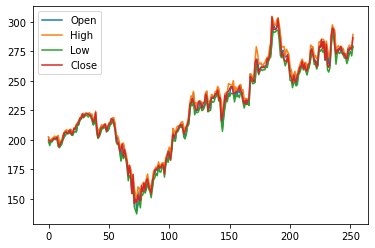

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
url="C:/Users/Win 10/Documents/FB.csv"
data= pd.read_csv(url)
data[["Open","High","Low","Close"]].plot()

### HANDLE THE MISSING VALUE

* 1. Drop the entire row or entire column containing the missing values
* 2. Numeric data: replace the missing value by the average of remaining
* 3. Categorical data: replace by the mode of that column

In [11]:
# function .dropna(): used to drop the row (axis=0) and column (axis=1) of NA values
data.dropna(subset=["Close"],axis=0,inplace=True)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
1,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
2,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
3,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400
4,2019-12-06,200.500000,201.570007,200.059998,201.050003,201.050003,12270600


In [12]:
# function .replace(): used to replace the NA values with certain new value
mean= data["Volume"].mean()
data["Volume"]=data["Volume"].replace(np.nan,mean)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
1,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
2,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
3,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400
4,2019-12-06,200.500000,201.570007,200.059998,201.050003,201.050003,12270600


### DATA FORMATING

* Data are usually been collected from different sources and formats
* Data formating is used to bring all into common standard of expression in order to make meaningful comparison

In [16]:
# Function .rename(): used to rename columns of dataframe
data.rename(columns={"Close":"Close Price"},inplace=True)
data.head(5)

,Date,Open,High,Low,Close Price,Adj Close,Volume
0,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
1,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
2,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
3,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400
4,2019-12-06,200.500000,201.570007,200.059998,201.050003,201.050003,12270600


In [23]:
# Function as.type(): change the convert data type
display(data.dtypes)
data["Volume"]=data["Volume"].astype("float")
display(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
dtype: object

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

### DATA NORMALIZATION

* Values from different attributes can have different range, which is difficult to comare
* We can normalize the data into the same range to make statistical analysis easier

* There are 3 simple methods for normalizing:
* SIMPLE FEATURE SCALING: x.new= x.old/x.max
* MIN-MAX:                x.new= (x.old-x.min)/(x.max-x.min)
* Z-SCORE:                x.new= (x.old-u)/sigma

In [27]:
# In order to use the above techniques for normalizing, we can use the following function
# .max(), .min() : max and min value 
# .mean(), .std(): mean and SD

display(data["Volume"].max())
display(data["Volume"].min())
display(data["Volume"].mean())
display(data["Volume"].std())

76343900.0

6046300.0

22183439.13043478

10615517.560949897

### BINNING

* Group the values into bins
* A way to convert numeric to categorical data

In [38]:
# Function np.linspace(): used to bins the numeric data based on number of categories we want to divide
# Function pd.cut(): used to segment and sort tha data into bins
bins= np.linspace(min(data["Close"]),max(data["Close"]),5) # I bins into 4 groups
names= ["A1","A2","A3","A4"]
data["bin_price"]=pd.cut(data["Close"],bins,labels=names,include_lowest=True)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,bin_price
0,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400,A2
1,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300,A2
2,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300,A2
3,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400,A2
4,2019-12-06,200.500000,201.570007,200.059998,201.050003,201.050003,12270600,A2


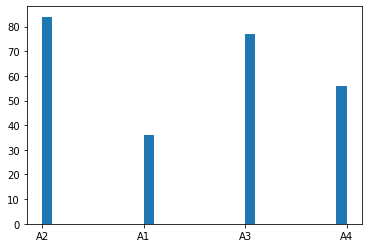

In [37]:
plt.hist(x=data["bin_price"],bins=30)
plt.show()

### TURN CATEGORICAL TO QUANTITATIVE VALUES

* Add dummy variables for each unique value of that categories, then assign value 1 and 0

In [41]:
# Function pd.get_dummies: used to convert categorical variables to dummies variable (1 and 0)
data_2= pd.read_csv("C:/Users/Win 10/Documents/R DIRECTORY/outcome-of-care-measures.csv")
pd.get_dummies(data_2["Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Heart Failure"])

,Better than U.S. National Rate,No Different than U.S. National Rate,Not Available,Number of Cases Too Small,Worse than U.S. National Rate
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
4701,0,0,1,0,0
4702,0,0,0,1,0
4703,0,0,0,1,0
4704,0,0,1,0,0
